In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics.pairwise import pairwise_distances

In [29]:
import numpy as np
import pandas as pd

I = pd.read_csv('../dataset/interactions_train.csv')
R = pd.read_csv('../dataset/RAW_recipes.csv')

I.info()
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    698901 non-null  int64  
 1   recipe_id  698901 non-null  int64  
 2   date       698901 non-null  object 
 3   rating     698901 non-null  float64
 4   u          698901 non-null  int64  
 5   i          698901 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 32.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 

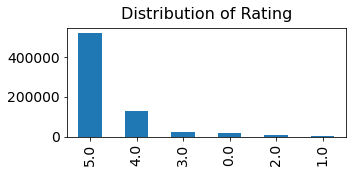

In [30]:
import matplotlib.pyplot as plt

I.rating.value_counts().plot(kind = 'bar', fontsize = 14,
                             figsize = (5, 2)).set_title('Distribution of Rating',
                                                         fontsize = 16, ha = 'center', va = 'bottom')

plt.show()

In [31]:
_all = I.drop(['date', 'u', 'i'], axis = 1)
_all

,user_id,recipe_id,rating
0,2046,4684,5.0
1,2046,517,5.0
2,1773,7435,5.0
3,1773,278,4.0
4,2046,3431,5.0
...,...,...,...
698896,926904,457971,5.0
698897,2002312797,27208,5.0
698898,1290903,131607,5.0
698899,226867,363072,5.0


In [32]:
grouped_1 = _all.groupby(['user_id'], as_index = False, sort = False).agg({'recipe_id':'count'}).reset_index(drop = True)
grouped_1 = grouped_1.rename(columns = {'recipe_id':'reviews_count'})
grouped_1 = grouped_1.sort_values('reviews_count', ascending = False).iloc[:7500,:]
grouped_1

,user_id,reviews_count
9980,424680,6437
575,37449,4581
9338,383346,3656
4264,169430,3465
3146,128473,3338
...,...,...
8361,308507,13
2096,71854,13
10093,99254,13
5853,228313,13


In [33]:
grouped_2 = _all.groupby(['recipe_id'], as_index = False, sort = False).agg({'user_id':'count'}).reset_index(drop = True)
grouped_2 = grouped_2.rename(columns = {'user_id':'reviews_count'})
grouped_2 = grouped_2.sort_values('reviews_count', ascending = False).iloc[:7500,:]
grouped_2

,recipe_id,reviews_count
2669,27208,1091
21058,89204,1075
3620,32204,897
5995,39087,894
18739,69173,787
...,...,...
63326,214917,14
48452,160457,14
20168,83642,14
42123,19766,14


In [34]:
_part = pd.merge(_all.merge(grouped_1).drop(['reviews_count'], axis = 1), grouped_2).drop(['reviews_count'], axis = 1)
_part

,user_id,recipe_id,rating
0,2312,2886,5.0
1,11044,2886,5.0
2,9869,2886,5.0
3,22655,2886,3.0
4,26313,2886,4.0
...,...,...,...
222248,2198132,518229,5.0
222249,2209000,518229,5.0
222250,2200124,518229,5.0
222251,2192609,518229,5.0


In [35]:
print('unique users:',len(_part.user_id.unique()))
print('unique recipes:',len(_part.recipe_id.unique()))

unique users: 7481
unique recipes: 7500


In [36]:
grouped_user = _part.groupby(['user_id'], as_index = False, sort = False).agg({'recipe_id':'count'}).reset_index(drop = True)
grouped_user = grouped_user.rename(columns = {'recipe_id':'reviews_count'})

grouped_recipe = _part.groupby(['recipe_id'], as_index = False, sort = False).agg({'user_id':'count'}).reset_index(drop = True)
grouped_recipe = grouped_recipe.rename(columns = {'user_id':'reviews_count'})

display(grouped_user[['reviews_count']].describe())
display(grouped_recipe[['reviews_count']].describe())

,reviews_count
count,7481.000000
mean,29.708996
std,49.227948
min,1.000000
25%,9.000000
50%,15.000000
75%,30.000000
max,1366.000000


,reviews_count
count,7500.000000
mean,29.633733
std,36.224671
min,5.000000
25%,15.000000
50%,19.000000
75%,30.000000
max,708.000000


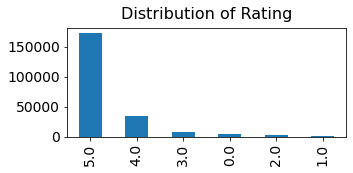

In [37]:
_part.rating.value_counts().plot(kind = 'bar', fontsize = 14, 
                                            figsize = (5,2)).set_title('Distribution of Rating',
                                                                      fontsize = 16, ha = 'center', va = 'bottom')

plt.show()

In [38]:
new_userID = dict(zip(list(_part['user_id'].unique()),
                      list(range(len(_part['user_id'].unique())))))
display(new_userID)

new_recipeID = dict(zip(list(_part['recipe_id'].unique()),
                      list(range(len(_part['recipe_id'].unique())))))
display(new_recipeID)

{2312: 0,
 11044: 1,
 9869: 2,
 22655: 3,
 26313: 4,
 25455: 5,
 25792: 6,
 10033: 7,
 8688: 8,
 28397: 9,
 29014: 10,
 30209: 11,
 29063: 12,
 42058: 13,
 43505: 14,
 32772: 15,
 60989: 16,
 55589: 17,
 64583: 18,
 30228: 19,
 76074: 20,
 85714: 21,
 88717: 22,
 96436: 23,
 93997: 24,
 25941: 25,
 101376: 26,
 59588: 27,
 98919: 28,
 92641: 29,
 111347: 30,
 91584: 31,
 126104: 32,
 60716: 33,
 135887: 34,
 121852: 35,
 122175: 36,
 144671: 37,
 148715: 38,
 130513: 39,
 140806: 40,
 155675: 41,
 155595: 42,
 142386: 43,
 162086: 44,
 163601: 45,
 172369: 46,
 168087: 47,
 162725: 48,
 184081: 49,
 188119: 50,
 189475: 51,
 99221: 52,
 186979: 53,
 194611: 54,
 203111: 55,
 201064: 56,
 207375: 57,
 207176: 58,
 215350: 59,
 218535: 60,
 217226: 61,
 215260: 62,
 227039: 63,
 224088: 64,
 124268: 65,
 143721: 66,
 235074: 67,
 203741: 68,
 257993: 69,
 259154: 70,
 145130: 71,
 246482: 72,
 269891: 73,
 297557: 74,
 272300: 75,
 302961: 76,
 267665: 77,
 307059: 78,
 315635: 79,
 2582

{2886: 0,
 3368: 1,
 11020: 2,
 9254: 3,
 13619: 4,
 15364: 5,
 15654: 6,
 14337: 7,
 18513: 8,
 20492: 9,
 16698: 10,
 33454: 11,
 37490: 12,
 31639: 13,
 18487: 14,
 45539: 15,
 35779: 16,
 35547: 17,
 52840: 18,
 61718: 19,
 19901: 20,
 75817: 21,
 14359: 22,
 39911: 23,
 86868: 24,
 65131: 25,
 106251: 26,
 109283: 27,
 21761: 28,
 132411: 29,
 109006: 30,
 202935: 31,
 239592: 32,
 200008: 33,
 5478: 34,
 55680: 35,
 24709: 36,
 79462: 37,
 17300: 38,
 55394: 39,
 53767: 40,
 83287: 41,
 51235: 42,
 37638: 43,
 118475: 44,
 30018: 45,
 70224: 46,
 63750: 47,
 57033: 48,
 90822: 49,
 213535: 50,
 2713: 51,
 17222: 52,
 3400: 53,
 19596: 54,
 24685: 55,
 4368: 56,
 40621: 57,
 8599: 58,
 12668: 59,
 29184: 60,
 18651: 61,
 18829: 62,
 23116: 63,
 19590: 64,
 23195: 65,
 25254: 66,
 11489: 67,
 33386: 68,
 30864: 69,
 21256: 70,
 50342: 71,
 37037: 72,
 37199: 73,
 51919: 74,
 67777: 75,
 45940: 76,
 30644: 77,
 38305: 78,
 27809: 79,
 59183: 80,
 47413: 81,
 29493: 82,
 46597: 83,
 

In [39]:
df = _part.replace({'user_id': new_userID, 'recipe_id': new_recipeID})
df

,user_id,recipe_id,rating
0,0,0,5.0
1,1,0,5.0
2,2,0,5.0
3,3,0,3.0
4,4,0,4.0
...,...,...,...
222248,7465,7499,5.0
222249,7475,7499,5.0
222250,7469,7499,5.0
222251,7472,7499,5.0


In [40]:
print('The recipes without names: ', R['id'][R['name'].isnull()].values[0])
display(df[df['recipe_id'] == R['id'][R['name'].isnull()].values[0]])

The recipes without names:  368257


,user_id,recipe_id,rating


In [41]:
recipe = R[['name', 'id', 'ingredients']].merge(_part[['recipe_id']], 
                                                left_on = 'id', right_on = 'recipe_id', 
                                                how = 'right').drop(['id'], axis = 1).drop_duplicates().reset_index(drop = True)
recipe

,name,ingredients,recipe_id
0,best banana bread,"['butter', 'granulated sugar', 'eggs', 'banana...",2886
1,blackberry pie iii,"['sugar', 'all-purpose flour', 'cornstarch', '...",3368
2,casablanca chicken,"['boneless skinless chicken breasts', 'olive o...",11020
3,grilled salmon,"['fresh salmon', 'butter', 'garlic', 'salt', '...",9254
4,homemade pie crust,"['all-purpose flour', 'salt', 'butter', 'cold ...",13619
...,...,...,...
7495,cheesy potato italian sausage balls 5fix,['simply potatoes traditional mashed potatoes'...,496573
7496,cheddar stuffed potato cake and egg 5fix,"['olive oil', 'simply potatoes traditional mas...",497382
7497,quick and easy crabby caesar salads 5fix,"['complete caesar salad in a bag', 'simply pot...",497261
7498,mac n cheese and spinach strata sp5,"['simply macaroni & cheese', 'frozen spinach',...",514423


In [42]:
print('unique users:',len(_part.user_id.unique()))
print('unique recipes:',len(_part.recipe_id.unique()))

unique users: 7481
unique recipes: 7500


In [43]:
mean = df.groupby(['user_id'], as_index = False, sort = False).mean().rename(columns = {'rating':'rating_mean'})
df = df.merge(mean[['user_id','rating_mean']], how = 'left')
df.insert(2, 'rating_adjusted', df['rating'] - df['rating_mean'])
df

,user_id,recipe_id,rating_adjusted,rating,rating_mean
0,0,0,0.382353,5.0,4.617647
1,1,0,0.304348,5.0,4.695652
2,2,0,0.088319,5.0,4.911681
3,3,0,-1.031250,3.0,4.031250
4,4,0,-0.692308,4.0,4.692308
...,...,...,...,...,...
222248,7465,7499,0.588235,5.0,4.411765
222249,7475,7499,0.000000,5.0,5.000000
222250,7469,7499,0.357143,5.0,4.642857
222251,7472,7499,0.384615,5.0,4.615385


In [44]:
#df.rename(columns={"rating_adjusted": "score"})[['user_id', 'recipe_id', 'score']].to_csv('dataset.csv', index=False)

In [45]:
train_data, test_data = train_test_split(df, test_size = 0.25)
display(train_data)
display(test_data)

,user_id,recipe_id,rating_adjusted,rating,rating_mean
139400,1343,3633,0.030303,5.0,4.969697
195952,895,5989,0.021930,5.0,4.978070
123631,5670,3118,0.263158,5.0,4.736842
104807,2440,2486,0.095238,5.0,4.904762
147468,1750,3924,0.074074,5.0,4.925926
...,...,...,...,...,...
165495,1160,4602,-0.482759,4.0,4.482759
1581,1231,43,0.739130,5.0,4.260870
137236,301,3564,-0.487179,4.0,4.487179
132792,374,3394,-0.176471,4.0,4.176471


,user_id,recipe_id,rating_adjusted,rating,rating_mean
195158,837,5945,0.000000,5.0,5.000000
70826,1370,1580,-0.375000,4.0,4.375000
176193,2890,5070,0.235294,5.0,4.764706
163458,4645,4532,1.000000,5.0,4.000000
60322,229,1301,0.351528,5.0,4.648472
...,...,...,...,...,...
104585,1184,2483,0.173913,5.0,4.826087
173687,360,4947,-0.377358,4.0,4.377358
55122,3013,1159,0.313725,5.0,4.686275
164331,3010,4565,0.470588,5.0,4.529412


In [46]:
for row in train_data.itertuples():
    print(row[1])

1343
895
5670
2440
1750
4211
319
1357
6733
413
4340
6567
3881
6864
1269
3323
846
6833
1277
689
1435
590
3527
1317
1621
450
172
3609
106
1377
4964
655
865
1362
1860
4242
1802
3287
4315
2564
97
948
6785
2123
544
4572
2402
956
296
410
979
644
1624
5425
776
1508
4584
1819
4620
6013
1112
211
1449
2451
1362
18
513
543
870
2453
2100
3371
2818
5752
6862
785
786
2499
2542
1556
739
4628
2265
4600
99
1047
793
5434
5485
3594
4832
6225
4373
3015
2527
2558
313
1779
5537
4647
975
4822
6977
1805
5753
819
336
1071
195
1076
1630
2524
812
6987
751
1679
2430
2426
3177
319
2167
228
1825
1314
5753
2873
3379
466
3351
2121
76
1022
5161
1137
239
759
1039
1166
5376
1052
458
4202
3398
285
6400
1000
5432
875
4323
322
3991
873
4098
3691
1107
1073
1005
4435
1241
3599
247
756
24
4566
630
4963
751
2064
5182
1164
861
2960
6
308
1039
2044
836
3993
4784
304
2353
5237
11
183
2941
2296
1475
142
4490
2307
2987
1762
304
5650
217
3231
4047
3181
412
4876
809
712
2529
325
3609
4757
768
466
4889
5133
6722
2567
875
3617
179
1350

In [47]:
n_users = df.user_id.unique()
n_items = df.recipe_id.unique()

train_data_matrix = np.zeros((n_users.shape[0], n_items.shape[0]))

for row in train_data.itertuples():
    train_data_matrix[row[1]-1, row[2]-1] = row[3]

display(train_data_matrix.shape)
display(train_data_matrix)

(7481, 7500)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.30434783],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.08831909],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.03125   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.38235294,  0.38235294, ...,  0.        ,
         0.        ,  0.38235294]])

In [48]:
test_data_matrix = np.zeros((n_users.shape[0], n_items.shape[0]))
for row in test_data.itertuples():
    test_data_matrix[row[1]-1, row[2]-1] = row[3]

display(test_data_matrix.shape)
display(test_data_matrix)

(7481, 7500)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
user_similarity = 1 - pairwise_distances(train_data_matrix, metric = 'cosine')

display(user_similarity.shape)
display(user_similarity)

(7481, 7481)

array([[ 1.        , -0.00531164, -0.02102589, ...,  0.        ,
         0.        ,  0.015624  ],
       [-0.00531164,  1.        , -0.01629427, ...,  0.        ,
         0.        ,  0.00124088],
       [-0.02102589, -0.01629427,  1.        , ...,  0.        ,
         0.        , -0.00631541],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.015624  ,  0.00124088, -0.00631541, ...,  0.        ,
         0.        ,  1.        ]])

In [50]:
item_similarity = 1 - pairwise_distances(train_data_matrix.T, metric = 'cosine')

display(item_similarity.shape)
display(item_similarity)

(7500, 7500)

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.05465812, ...,  0.        ,
         0.        , -0.01893735],
       [ 0.        ,  0.05465812,  1.        , ...,  0.        ,
         0.        ,  0.00666334],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.04884218,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.04884218,
         1.        ,  0.        ],
       [ 0.        , -0.01893735,  0.00666334, ...,  0.        ,
         0.        ,  1.        ]])

In [51]:
def predict(ratings, similarity, _type = 'user'):
    if _type == 'user':
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis = np.newaxis)])
    
    elif _type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis = 1)]) 
    
    return pred

In [52]:
user_pred = predict(train_data_matrix, user_similarity, _type = 'user')

display(user_pred.shape)
display(user_pred)

(7481, 7500)

array([[-4.95655984e-08, -8.26394687e-08, -1.97463510e-08, ...,
         0.00000000e+00,  0.00000000e+00,  3.37280269e-05],
       [ 3.76487548e-08,  2.35341841e-07, -4.97999693e-08, ...,
         0.00000000e+00,  0.00000000e+00,  3.14099894e-06],
       [ 8.76019095e-08,  8.08013759e-09,  1.85660881e-07, ...,
         0.00000000e+00,  0.00000000e+00, -2.04151848e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.05174979e-08,  2.54804705e-06,  2.84232692e-06, ...,
         0.00000000e+00,  0.00000000e+00,  1.19686874e-05]])

In [53]:
user_pred_df = pd.DataFrame(user_pred, columns = list(n_items))
user_pred_df.insert(0, 'user_id', list(n_users))

user_pred_df

,user_id,0,1,2,3,4,5,6,7,8,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,-4.956560e-08,-8.263947e-08,-1.974635e-08,1.145344e-08,1.772333e-07,2.887029e-07,-4.263767e-08,1.030297e-07,4.656362e-08,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000034
1,1,3.764875e-08,2.353418e-07,-4.979997e-08,2.407029e-07,-3.111690e-09,-2.270100e-08,-1.222345e-06,6.403612e-08,-8.494559e-08,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000003
2,2,8.760191e-08,8.080138e-09,1.856609e-07,-1.597690e-07,-7.719465e-09,3.961563e-08,8.780172e-07,-2.228945e-07,-3.584349e-08,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000020
3,3,3.737751e-07,7.259188e-08,-8.697105e-08,-3.094238e-07,-2.318822e-07,-9.553709e-07,3.662573e-07,2.127112e-07,-3.420186e-08,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000034
4,4,-4.892001e-08,7.095171e-08,-2.182361e-08,-1.296343e-07,-1.459144e-06,1.873851e-07,-2.727391e-07,5.802153e-08,8.029508e-09,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,7476,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7477,7477,0.000000e+00,0.000000e+00,2.390166e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000007,-0.000001,0.000004,0.000006,0.00001,0.000004,0.000002,0.000009,-0.000009,0.000000
7478,7478,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7479,7479,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
item_pred = predict(train_data_matrix, item_similarity, _type = 'item')

display(item_pred.shape)
display(item_pred)

(7481, 7500)

array([[-0.00094716, -0.00017391, -0.00028834, ...,  0.        ,
         0.        ,  0.00748527],
       [-0.00200702,  0.00602349, -0.00470851, ...,  0.        ,
         0.        ,  0.00295807],
       [-0.00560265, -0.00220405,  0.00592559, ...,  0.        ,
         0.        , -0.08587765],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00199011,  0.07498918,  0.03159548, ...,  0.        ,
         0.        ,  0.01445388]])

In [55]:
item_pred_df = pd.DataFrame(item_pred, columns = list(n_items))
item_pred_df.insert(0, 'user_id', list(n_users))

item_pred_df

,user_id,0,1,2,3,4,5,6,7,8,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,-0.000947,-0.000174,-0.000288,-0.000404,0.000113,0.000413,-0.000261,0.000116,0.000231,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007485
1,1,-0.002007,0.006023,-0.004709,0.000790,0.000764,-0.000489,-0.001610,0.000988,-0.007173,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002958
2,2,-0.005603,-0.002204,0.005926,0.000324,-0.000331,0.000100,0.004360,-0.006366,-0.001435,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.085878
3,3,0.002186,0.002656,-0.000305,-0.000880,-0.000911,-0.000631,-0.000768,0.001316,-0.000483,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.019422
4,4,-0.003412,0.000013,0.004583,-0.001083,-0.013145,0.002756,-0.000066,0.002303,0.000458,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,7476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7477,7477,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.01443,-0.002928,0.022138,0.009696,0.022356,0.018841,0.010792,0.020837,-0.021567,0.000000
7478,7478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7479,7479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
def RMSE(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    
    return sqrt(mean_squared_error(prediction, ground_truth))

In [60]:
user_RMSE = RMSE(user_pred, test_data_matrix)
item_RMSE = RMSE(item_pred, test_data_matrix)

print('user_RMSE = {}'.format(user_RMSE))
print('item_RMSE = {}'.format(item_RMSE))

user_RMSE = 0.8646856134443796
item_RMSE = 0.8647049127770996


In [61]:
def getRecommendations_UserBased(user_id, top_n = 10):
    for old_user, new_user in new_userID.items():
        if user_id == new_user:
            print(f'Top {top_n} Recommended Recipes for Original User ID: {old_user}\n')
    
    movie_rated = list(df['recipe_id'].loc[df['user_id'] == user_id])
    _all = user_pred_df.loc[user_pred_df['user_id'] == user_id].copy()
    _all.drop(user_pred_df[movie_rated], axis = 1, inplace = True)
    unwatch_sorted = _all.iloc[:,1:].sort_values(by = _all.index[0], axis = 1, ascending = False)
    dict_top_n = unwatch_sorted.iloc[:, :top_n].to_dict(orient = 'records')

    i = 1
    for recipe_id in list(dict_top_n[0].keys()):
        for old_recipe, new_recipe in new_recipeID.items():
            if recipe_id == new_recipe:
                name = recipe[recipe['recipe_id'] == old_recipe]['name'].values[0]
                ingredients = recipe[recipe['recipe_id'] == old_recipe]['ingredients'].values[0]

                print(f'Top {i} Original Recipe ID: {old_recipe} - {name}\n Ingredients: {ingredients}\n')
                
                i += 1
                
    return dict_top_n[0]

In [105]:
R1_UserBased = getRecommendations_UserBased(7446)
R1_UserBased

Top 10 Recommended Recipes for Original User ID: 630190

Top 1 Original Recipe ID: 2886 - best banana bread
 Ingredients: ['butter', 'granulated sugar', 'eggs', 'bananas', 'all-purpose flour', 'baking soda', 'salt', 'vanilla']

Top 2 Original Recipe ID: 299075 - herb coated cod
 Ingredients: ['butter', 'butter flavored cracker', 'parmesan cheese', 'dried oregano', 'dried basil', 'garlic powder', 'cod fish fillet']

Top 3 Original Recipe ID: 330186 - caramelised onion   goats cheese omelette
 Ingredients: ['red onion', 'garlic cloves', 'butter', 'sugar', 'eggs', 'goat cheese', 'rosemary', 'sage', 'oregano', 'marjoram', 'thyme', 'salt', 'fresh ground black pepper', 'rocket', 'olive oil', 'lemon zest']

Top 4 Original Recipe ID: 321734 - pan fried fish almondine
 Ingredients: ['panko breadcrumbs', 'lemon, zest of', 'almonds', 'fish fillets', 'salt and pepper', 'eggs', 'water', 'flour', 'butter', 'parsley']

Top 5 Original Recipe ID: 271786 - vanilla coffee
 Ingredients: ['powdered coffee 

{0: 0.0,
 4995: 0.0,
 5007: 0.0,
 5006: 0.0,
 5005: 0.0,
 5004: 0.0,
 5003: 0.0,
 5002: 0.0,
 5001: 0.0,
 5000: 0.0}

In [70]:
recipe

,name,ingredients,recipe_id
0,best banana bread,"['butter', 'granulated sugar', 'eggs', 'banana...",2886
1,blackberry pie iii,"['sugar', 'all-purpose flour', 'cornstarch', '...",3368
2,casablanca chicken,"['boneless skinless chicken breasts', 'olive o...",11020
3,grilled salmon,"['fresh salmon', 'butter', 'garlic', 'salt', '...",9254
4,homemade pie crust,"['all-purpose flour', 'salt', 'butter', 'cold ...",13619
...,...,...,...
7495,cheesy potato italian sausage balls 5fix,['simply potatoes traditional mashed potatoes'...,496573
7496,cheddar stuffed potato cake and egg 5fix,"['olive oil', 'simply potatoes traditional mas...",497382
7497,quick and easy crabby caesar salads 5fix,"['complete caesar salad in a bag', 'simply pot...",497261
7498,mac n cheese and spinach strata sp5,"['simply macaroni & cheese', 'frozen spinach',...",514423


In [85]:
recipe_map = pd.DataFrame(new_recipeID, index=[0]).T.reset_index().rename(columns={'index': 'old_recipe', 0: 'recipe_id'})

In [86]:
df.merge(recipe_map, on='recipe_id')

,user_id,recipe_id,rating_adjusted,rating,rating_mean,old_recipe
0,0,0,0.382353,5.0,4.617647,2886
1,1,0,0.304348,5.0,4.695652,2886
2,2,0,0.088319,5.0,4.911681,2886
3,3,0,-1.031250,3.0,4.031250,2886
4,4,0,-0.692308,4.0,4.692308,2886
...,...,...,...,...,...,...
222248,7465,7499,0.588235,5.0,4.411765,518229
222249,7475,7499,0.000000,5.0,5.000000,518229
222250,7469,7499,0.357143,5.0,4.642857,518229
222251,7472,7499,0.384615,5.0,4.615385,518229


In [100]:
df[df['user_id'] == 7446].merge(recipe_map, on='recipe_id').merge(recipe, left_on='old_recipe', right_on='recipe_id')

,user_id,recipe_id_x,rating_adjusted,rating,rating_mean,old_recipe,name,ingredients,recipe_id_y
0,7446,5935,0.0,5.0,5.0,191225,hershey s kiss peanut butter cookies,"['shortening', 'peanut butter', 'sugar', 'brow...",191225


In [99]:
df['user_id'].value_counts()

319     1366
170      738
751      710
235      689
210      630
        ... 
7446       1
7160       1
7347       1
7409       1
7364       1
Name: user_id, Length: 7481, dtype: int64